# Chapter 10  Unsupervised Learning

### [Lab 1: Principal Components Analysis](#lab1)

### [Lab 2: Clustering](#lab2)
- [Lab 10.5.1 K-Means Clustering](#lab-10.5.1)
- [Lab 10.5.2 Hierarchical Clustering](#lab-10.5.2)

### [Lab 3: NCI60 Data Example](#lab3)
- [Lab 10.6.1 PCA on the NCI60 Data](#lab-10.6.1)
- [Lab 10.6.2 Clustering the Observations of the NCI60 Data](#lab-10.6.2) 

### Imports and Configurations

In [1]:
# Use rpy2 for loading R datasets
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import data as rdata
from rpy2.robjects import pandas2ri

# Math and data processing
import numpy as np
import scipy as sp
import pandas as pd

# scikit-learn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# scipy
from scipy.cluster import hierarchy

# Visulization
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

<a id='lab1'></a>

### Lab 1: Principal Component Analysis

In [2]:
# USArrests dataset is in R base package
rbase = importr('base')
usarrests_rdf = rdata(rbase).fetch('USArrests')['USArrests']
usarrests = pandas2ri.ri2py(usarrests_rdf)
display(usarrests.head(5))

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
usarrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int32
UrbanPop    50 non-null int32
Rape        50 non-null float64
dtypes: float64(2), int32(2)
memory usage: 1.6+ KB


In [4]:
# Mean and variance
print(usarrests.mean())
print(usarrests.var())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [5]:
# Standardize the data
X = pd.DataFrame(scale(usarrests), index=usarrests.index, columns=usarrests.columns)
print(X.mean())
print(X.var())

Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64
Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64


In [6]:
# Principal Component Analysis
pca = PCA()
usarrests_loadings = pd.DataFrame(pca.fit(X).components_.T, index=usarrests.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_loadings)

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [7]:
usarrests_score = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_score)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


In [8]:
# Standard deviation, Variance, and EVR of principal components
usarrests_score_stdvar = pd.DataFrame([np.sqrt(pca.explained_variance_), pca.explained_variance_, pca.explained_variance_ratio_], index=['STDEV', 'VAR', 'Explained VAR Ratio'], columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_score_stdvar)

,PC1,PC2,PC3,PC4
STDEV,1.574878,0.994869,0.597129,0.416449
VAR,2.480242,0.989765,0.356563,0.173430
Explained VAR Ratio,0.620060,0.247441,0.089141,0.043358


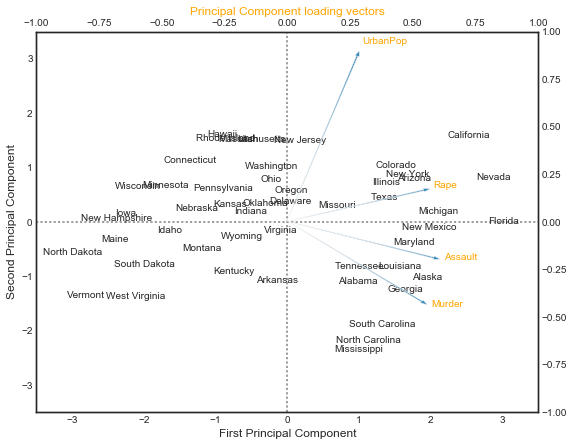

In [9]:
mpl.style.use('seaborn-white')
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in usarrests_score.index:
    ax1.annotate(i, (usarrests_score.PC1.loc[i], -usarrests_score.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in usarrests_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (usarrests_loadings.PC1.loc[i]*a, -usarrests_loadings.PC2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,usarrests_loadings.PC1[0], -usarrests_loadings.PC2[0], width=0.006)
ax2.arrow(0,0,usarrests_loadings.PC1[1], -usarrests_loadings.PC2[1], width=0.006)
ax2.arrow(0,0,usarrests_loadings.PC1[2], -usarrests_loadings.PC2[2], width=0.006)
ax2.arrow(0,0,usarrests_loadings.PC1[3], -usarrests_loadings.PC2[3], width=0.006);


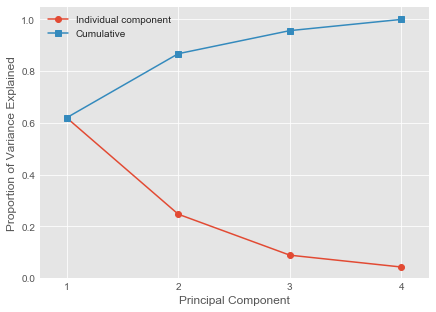

In [10]:
mpl.style.use('ggplot')
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

<a id='lab2'></a>

### Lab 2: Clustering

<a id='lab-10.5.1'></a>

### Lab 10.5.1 K-Means Clustering

In [11]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

**K = 2**

In [12]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)

**K = 3**

In [14]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [16]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [17]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2], dtype=int32)

In [18]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.973792009397258

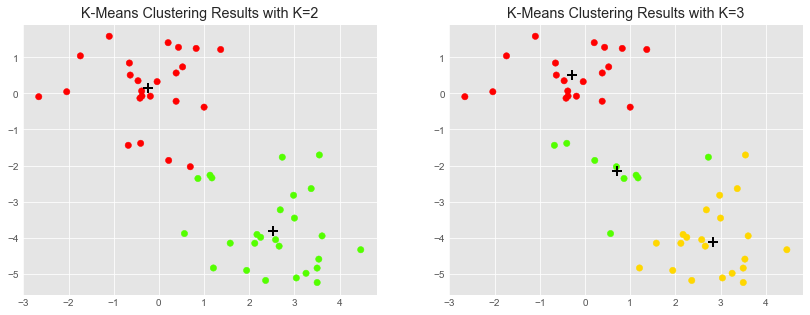

In [19]:
# Plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

<a id='lab-10.5.2'></a>

### Lab 10.5.2 Hierarchical Clustering

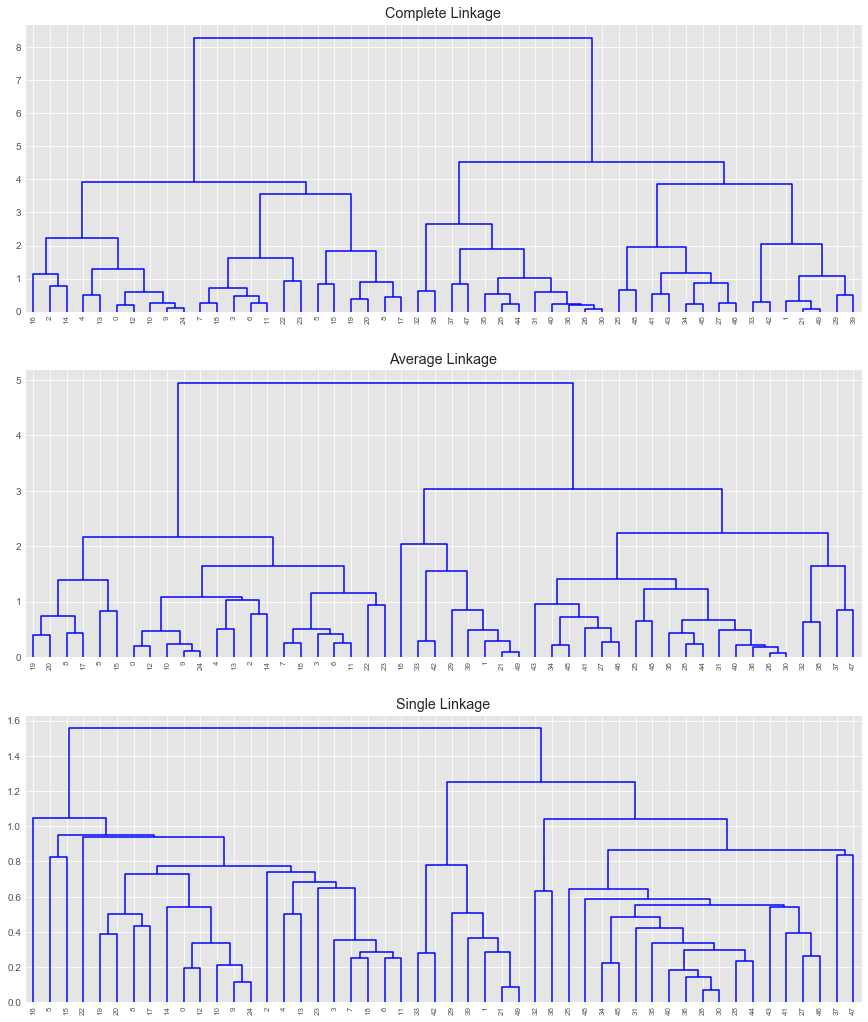

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

<a id='lab3'></a>

### Lab 3: NCI60 Data Example

<a id='lab-10.6.1'></a>

### Lab 10.6.1 PCA on the NCI60 Data

In [21]:
# NCI60 dataset is in R ISLR package
islr = importr('ISLR')
nci60_rdf = rdata(islr).fetch('NCI60')['NCI60']
list(nci60_rdf.names)

['data', 'labs']

In [22]:
nci60_labs = pd.DataFrame(pandas2ri.ri2py(nci60_rdf[1]))
nci60_data = pd.DataFrame(scale(pandas2ri.ri2py(nci60_rdf[0])), index=nci60_labs[0])
display(nci60_data.head(5))
display(nci60_labs.head(5))

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
0,,,,,,,,,,,,,,,,,,,,,
CNS,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
CNS,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
CNS,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
RENAL,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
BREAST,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


,0
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [23]:
nci60_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, CNS to MELANOMA
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3+ MB


In [24]:
nci60_labs[0].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562B-repro    1
UNKNOWN        1
K562A-repro    1
MCF7D-repro    1
MCF7A-repro    1
Name: 0, dtype: int64

In [25]:
# PCA
pca = PCA()
nci60_pca = pd.DataFrame(pca.fit_transform(nci60_data))

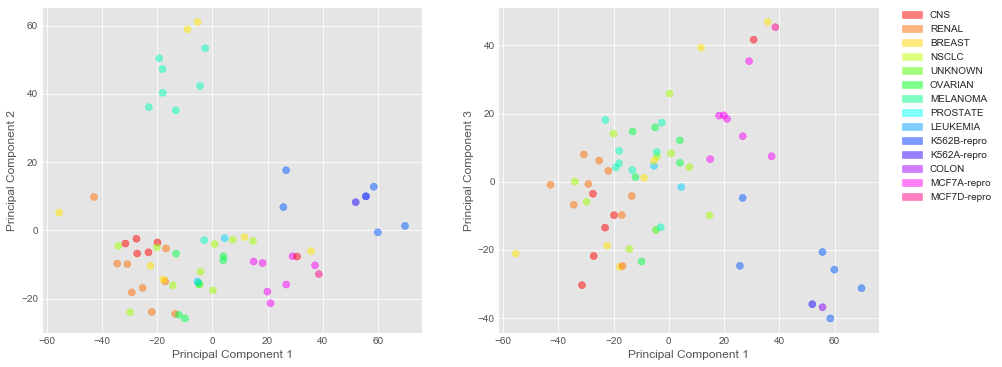

In [26]:
# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(nci60_labs[0])[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(nci60_pca.iloc[:,0], nci60_pca.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(nci60_pca.iloc[:,0], nci60_pca.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(nci60_labs[0].unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')    

In [27]:
pd.DataFrame([nci60_pca.iloc[:,:5].std(axis=0, ddof=0).as_matrix(),
              pca.explained_variance_ratio_[:5],
              np.cumsum(pca.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


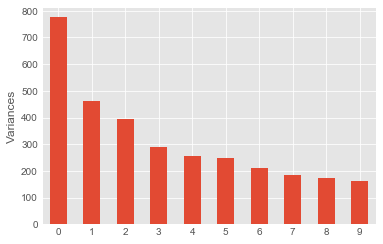

In [28]:
nci60_pca.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

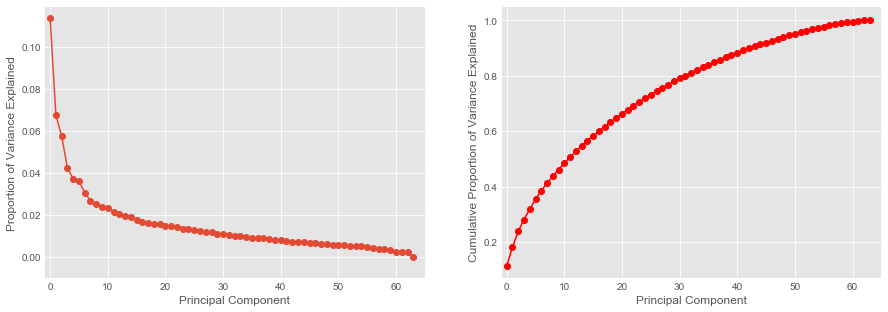

In [29]:
# scree plot
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)  

<a id='lab-10.6.2'></a>

### Lab 10.6.2 Clustering the Observations of the NCI60 Data

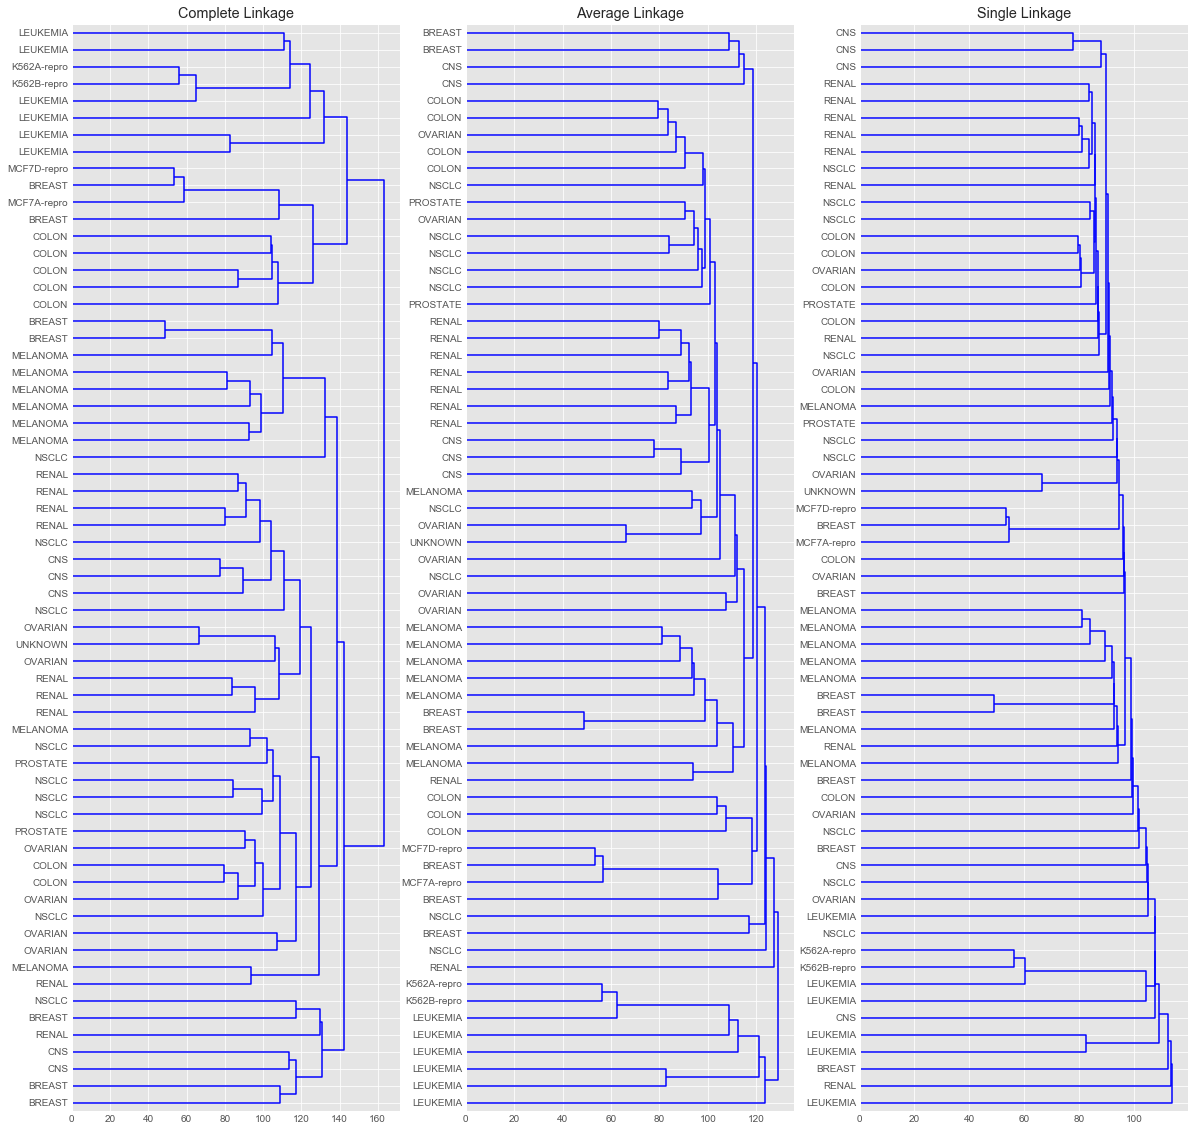

In [30]:
# dendrogram
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(nci60_data), hierarchy.average(nci60_data), hierarchy.single(nci60_data)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=nci60_data.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

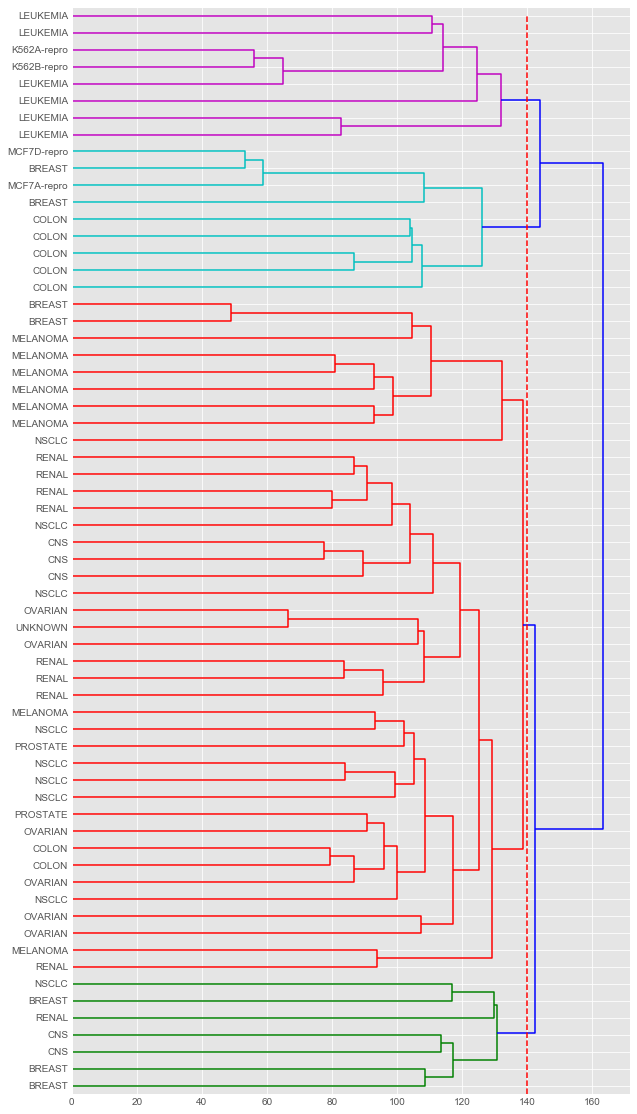

In [31]:
# Cut dendrogram with complete linkage
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(nci60_data),
                            labels=nci60_data.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

**KMeans**

In [32]:
np.random.seed(2)
km_nci60 = KMeans(n_clusters=4, n_init=50)
km_nci60.fit(nci60_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
km_nci60.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [34]:
# Observations per KMeans cluster
pd.Series(km_nci60.labels_).value_counts().sort_index()

0     8
1    23
2    24
3     9
dtype: int64

**Hierachical**

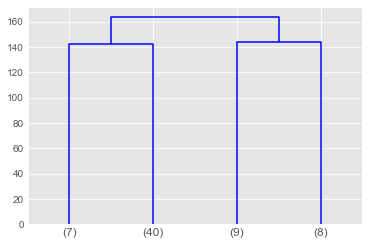

In [35]:
# Observations per Hierarchical cluster
nci60_cut = hierarchy.dendrogram(hierarchy.complete(nci60_data), truncate_mode='lastp', p=4, show_leaf_counts=True)

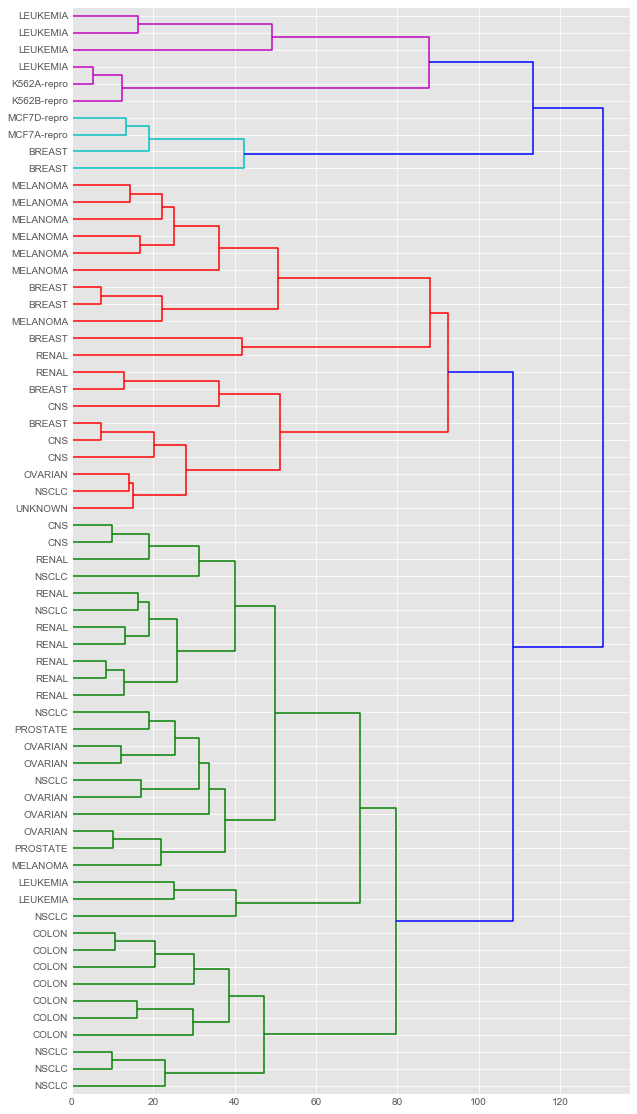

In [36]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(nci60_pca.iloc[:,:5]), labels=nci60_labs[0].values, orientation='right', color_threshold=100, leaf_font_size=10)

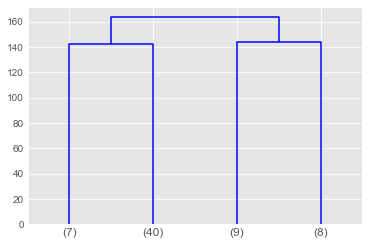

In [37]:
hierarchy.dendrogram(hierarchy.complete(nci60_pca), truncate_mode='lastp', p=4,
                     show_leaf_counts=True);